In [ ]:
#Jackson van der Werf
#Checkpoint 14-8

#Import data
import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/mpg.csv')

#output to dataframe and make calculations
df_output = pd.DataFrame(columns=['Count', 'Min', 'Q1', 'Q2/Median', 'Q3', 'Max', 'Mode', 'Mean', 'Std', 'Skew', 'Kurtosis'])
for col in df: #loops through each column in the dataframe
  if pd.api.types.is_numeric_dtype(df[col].dtype): #shows whether the data type is numeric or nahh
    df_output.loc[col] = [df[col].count(), df[col].min(), df[col].quantile(.25), df[col].median(), df[col].quantile(.75), df[col].max(), df[col].mode().values[0], df[col].mean(), df[col].std(), df[col].skew(), df[col].kurt()]    
  else: #not numeric
    df_output.loc[col] = [df[col].count(), '-', '-', '-', '-', '-', df[col].mode().values[0], '-', '-', '-', '-']    
df_output

,Count,Min,Q1,Q2/Median,Q3,Max,Mode,Mean,Std,Skew,Kurtosis
MPG,392.0,9,17,22.75,29,46.6,13,23.4459,7.80501,0.457092,-0.515993
Cylinders,392.0,3,4,4,8,8,4,5.47194,1.70578,0.508109,-1.3982
Displacement,392.0,68,105,151,275.75,455,97,194.412,104.644,0.701669,-0.778317
Horse_Power,392.0,46,75,93.5,126,230,150,104.469,38.4912,1.08733,0.696947
Weight,392.0,1613,2225.25,2803.5,3614.75,5140,1985,2977.58,849.403,0.519586,-0.809259
Acceleration,392.0,8,13.775,15.5,17.025,24.8,14.5,15.5413,2.75886,0.291587,0.444234
Model_Year,392.0,70,73,76,79,82,73,75.9796,3.68374,0.0196883,-1.16745
Name,392.0,-,-,-,-,-,amc matador,-,-,-,-


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

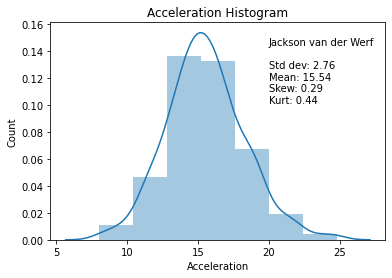

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import data
df = pd.read_csv('https://www.ishelp.info/data/mpg.csv')

#add text
text  = 'Jackson van der Werf \n \n'
text += 'Std dev: ' + str(round(df.Acceleration.std(), 2)) + '\n'
text += 'Mean: ' + str(round(df.Acceleration.mean(), 2)) + '\n'
text += 'Skew: ' + str(round(df.Acceleration.skew(), 2)) + '\n'
text += 'Kurt: ' + str(round(df.Acceleration.kurt(), 2))

#create seaborn plot
ax = sns.distplot(df.Acceleration, rug=False, bins=int(round(df.Acceleration.count()**(1/3), 0)))
ax.set_ylabel('Count')
ax.set_title("Acceleration Histogram")
tx = ax.text(0.63, 0.60, text, fontsize=10, transform=plt.gcf().transFigure)

#download png
from google.colab import files
plt.savefig("Acceleration.png")
files.download("Acceleration.png") 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

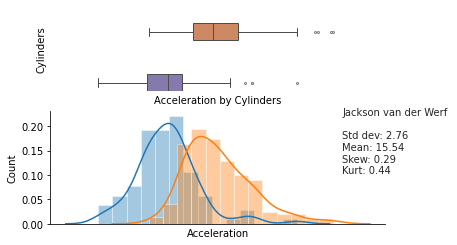

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('http://www.ishelp.info/data/mpg.csv')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .20)}) #find out what this does

sns.set(style="ticks") #find out what this does

# Boxplots
flierprops = dict(marker='o', markersize=2, markerfacecolor='none', linestyle='none', markeredgecolor='gray') #find out what this does
sns.boxplot(x=df[df['Cylinders']==8].Acceleration, y=df.Cylinders, ax=ax_box, fliersize=4, width=1, linewidth=1, flierprops = flierprops, orient='h')
sns.boxplot(x=df[df['Cylinders']==4].Acceleration, y=df.Cylinders, ax=ax_box, fliersize=4, width=1, linewidth=1, flierprops = flierprops, orient='h')

# Histograms
ax = sns.distplot(df[df['Cylinders']==8].Acceleration)
ax = sns.distplot(df[df['Cylinders']==4].Acceleration)

ax_box.set(yticks=[])
ax_box.set(xticks=[]) 
ax_box.set_xlabel('Acceleration by Cylinders')
ax.set_ylabel('Count')
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True, bottom=True) 

#create and move text box
text  = 'Jackson van der Werf \n \n'
text += 'Std dev: ' + str(round(df.Acceleration.std(), 2)) + '\n'
text += 'Mean: ' + str(round(df.Acceleration.mean(), 2)) + '\n'
text += 'Skew: ' + str(round(df.Acceleration.skew(), 2)) + '\n'
text += 'Kurt: ' + str(round(df.Acceleration.kurt(), 2))
tx = ax.text(.8, .3, text, fontsize=10, transform=plt.gcf().transFigure)

#save it
from google.colab import files
plt.savefig("HistAndBox.png")
files.download("HistAndBox.png") 